# Anime Data from MyAnimeList (MAL)

MyAnimeList (https://myanimelist.net) or MAL is a huge online database of anime and manga and a anime viewer community. If you like anime/manga, you should try this website. You could also track your anime watching list. The website provides many related data about each anime such as studios, season, broadcast time, etc. The website allowed users to give score (1-10) for each anime, as well.

## 1. Data Analysis

We will do some data analysis of the data we have to provide interesting data.

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data frame
#from https://www.kaggle.com/aludosan/myanimelist-anime-dataset-as-20190204/downloads/myanimelist-anime-dataset-as-20190204.zip/1
animeDF = pd.read_csv('anime_data.csv')

We could see that we have about 15000 titles (15278) in our dataset and there are 27 fields!

In [3]:
#shape of data frame
#we have about 15k anime titles!
animeDF.shape

(15278, 27)

In [4]:
#disply first three rows
animeDF.head(3)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],...,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."


In [5]:
#display last three rows
animeDF.tail(3)

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
15275,39197,Karrimor Mountain Club,Karrimor Mountain Club,Karrimor Mountain Club,[],ONA,Original,[],"['Adventure', 'Slice of Life']",[],...,0.0,11624.0,15424.0,10.0,0.0,A series of animated commercials produced by K...,NaN,NaN,NaN,{}
15276,39198,Kanata no Astra,NaN,彼方のアストラ,['Astra Lost in Space'],TV,Manga,[],"['Action', 'Sci-Fi', 'Shounen', 'Space']",['Lerche'],...,0.0,0.0,0.0,0.0,2.0,"The year is 2061, when space travel is now pos...",NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 98578, 'type': 'man..."
15277,39199,Katsute Kami Datta Kemono-tachi e,NaN,かつて神だった獣たちへ,['To the Abandoned Sacred Beasts'],TV,Manga,[],"['Fantasy', 'Shounen']",['MAPPA'],...,0.0,0.0,0.0,9.0,1.0,"During the Civil War, the North—desperate to d...",NaN,NaN,Unknown,"{'Adaptation': [{'mal_id': 72117, 'type': 'man..."


### Anime production

We will find the trend of the number of the anime produced in each season/year.

In [6]:
#take airing date
animePremier = animeDF.loc[:, ' premiered']
animePremier = animePremier.fillna('')

In [7]:
#this is a modified function from lab in our class to clean up the string in the dataframe
def parse_list_text(text, sep = ','): 
    remove = ['\'', '[', ']', '\"']
    word_list = text.split(sep)
    for i in range(len(word_list)) :
        for re in remove :
            word_list[i] = word_list[i].replace(re, '')
            word_list[i] = word_list[i].strip()
    word_list = [word for word in word_list if len(word) != 0] #remove empty string
    return word_list

In [8]:
#find the maximum
def find_max(dct):
    m = list(dct.keys())[0]
    max_val = 0
    for elem in dct:
        if dct[elem] > dct[m]:
            m = elem
            max_val = dct[elem]
    return m  
   
#find n most occurrence
def find_n_max(dct, n):
    rslt = {}
    dct_copy = dct.copy()
    cap = np.infty
    for i in range(n):
        m = find_max(dct_copy)
        rslt[m] = dct_copy[m]
        cap = dct_copy[m]
        dct_copy.pop(m)
    return rslt

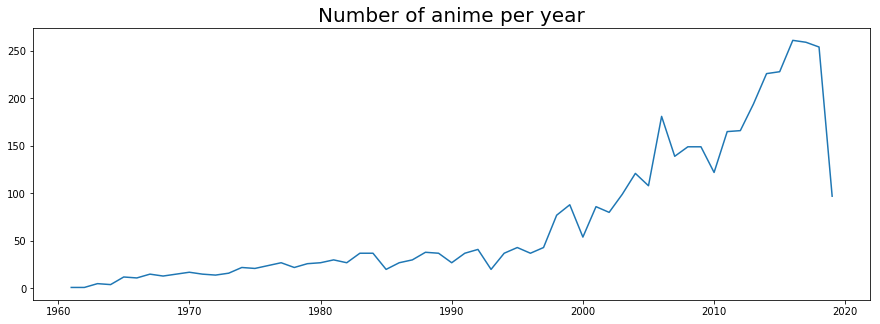

In [9]:
#find the number of anime per year
season_count = animePremier.value_counts().to_dict()
season_count.pop('')
year_count = {}
for key in season_count:
    sep = parse_list_text(key, ' ')
    year = int(sep[1])
    if year in year_count :
        year_count[year] += season_count[key]
    else :
        year_count[year] = season_count[key]

plt.figure(figsize = (15, 5))
plt.plot(*zip(*sorted(year_count.items())))
plt.title('Number of anime per year', fontsize = 20)
plt.show()

### Anime Sources
We will see the trends of the sources of anime

In [10]:
#find which sources anime come from
animeSource = animeDF.loc[:, ' source']
animeSource = animeSource.fillna('')
source_count = animeSource.value_counts().to_dict()
source_count.pop('Unknown')
source_count.pop('')
source_count

{'Original': 3923,
 'Manga': 3244,
 'Visual novel': 896,
 'Game': 701,
 'Light novel': 611,
 'Other': 451,
 'Novel': 387,
 'Music': 306,
 '4-koma manga': 244,
 'Web manga': 188,
 'Picture book': 108,
 'Book': 97,
 'Card game': 58,
 'Digital manga': 12,
 'Radio': 9}

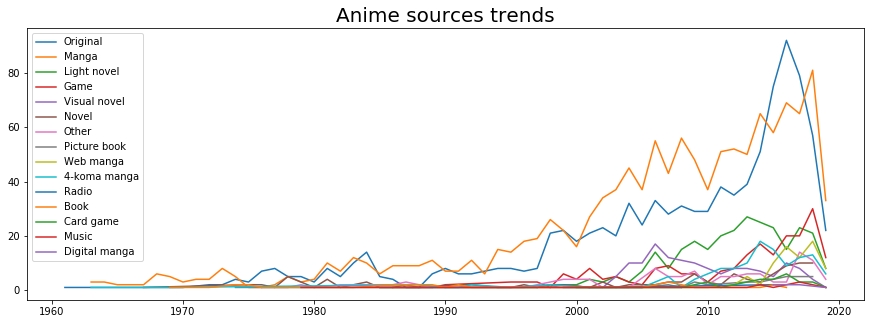

In [11]:
#find anime source trends
source_type = source_count.keys()
source_trend = {}
for index, source in enumerate(animeSource):
    if source in source_type:
        if animePremier[index] != '':
            season, year = parse_list_text(animePremier[index], ' ')
            year = int(year)
            if source in source_trend:
                if year in source_trend[source]:
                    source_trend[source][year] += 1
                else:
                    source_trend[source][year] = 1
            else :
                source_trend[source] = {}
                source_trend[source][year] = 1

plt.figure(figsize = (15, 5))                
for index, source in enumerate(source_trend):
    plt.plot(*zip(*sorted(source_trend[source].items())), label = source)
plt.legend()
plt.title('Anime sources trends', fontsize = 20)
plt.show()

### Anime Genres

We are interested to find the trend in genre of anime. We will try to find out which genre you should follow if you are an anime producer.

In [12]:
#find 10 most popular genre
animeGenre = animeDF.loc[:, ' genre']
animeGenre = animeGenre.fillna('')
genre_count = {}
for genre_list in animeGenre:
    lst = parse_list_text(genre_list)
    for g in lst:
        if g in genre_count:
            genre_count[g] += 1
        else:
            genre_count[g] = 1
find_n_max(genre_count, 10)

{'Comedy': 5404,
 'Action': 3379,
 'Fantasy': 2822,
 'Adventure': 2633,
 'Drama': 2332,
 'Sci-Fi': 2326,
 'Kids': 2220,
 'Shounen': 1818,
 'Romance': 1667,
 'Slice of Life': 1631}

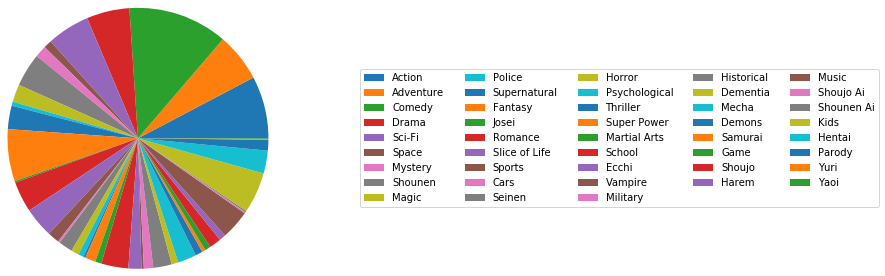

In [13]:
#plot pie chart of genre
plt.pie([float(v) for v in genre_count.values()], radius = 1.5)
plt.legend(labels=[k for k in genre_count.keys()], loc='center left', bbox_to_anchor=(1.5, 0.5), ncol = 5)
plt.show()

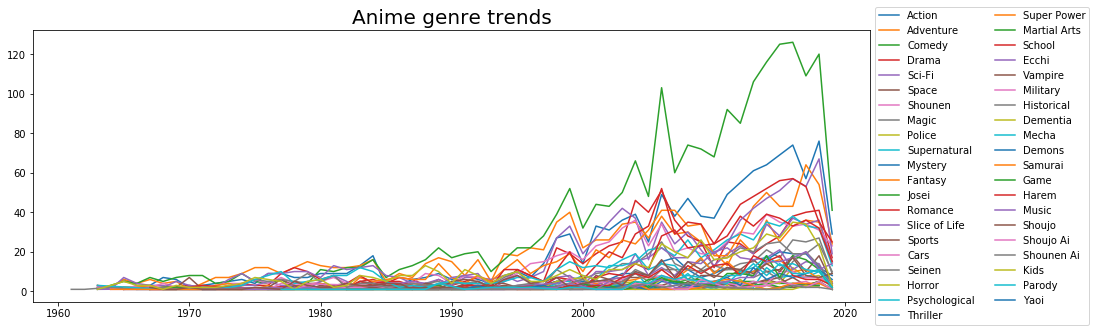

In [14]:
#see the trend in anime sources
genre_type = genre_count.keys()
genre_trend = {}
for index, genre_list in enumerate(animeGenre):
    if animePremier[index] != '':
        season, year = parse_list_text(animePremier[index], ' ')
        year = int(year)
        lst = parse_list_text(genre_list)
        for g in lst:
            if g in genre_trend:
                if year in genre_trend[g]:
                    genre_trend[g][year] += 1
                else:
                    genre_trend[g][year] = 1
            else :
                genre_trend[g] = {}
                genre_trend[g][year] = 1

plt.figure(figsize = (15, 5))                
for genre in genre_trend:
    plt.plot(*zip(*sorted(genre_trend[genre].items())), label = genre)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2)
plt.title('Anime genre trends', fontsize = 20)
plt.show()

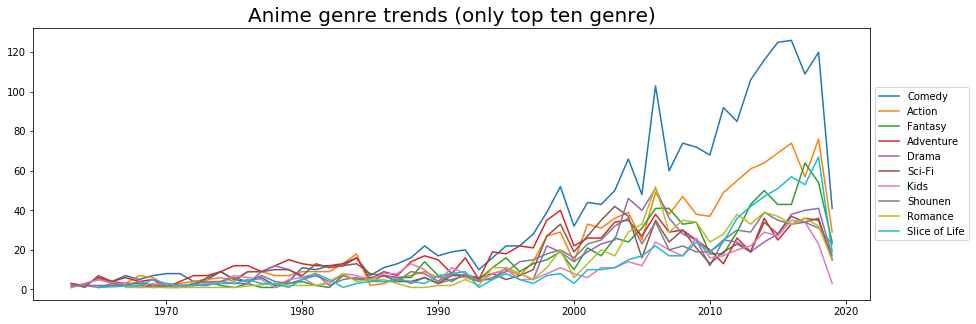

In [15]:
#since there are too many genre, we will plot only the top ten genre
plt.figure(figsize = (15, 5))                
for genre in find_n_max(genre_count, 10):
    plt.plot(*zip(*sorted(genre_trend[genre].items())), label = genre)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)
plt.title('Anime genre trends (only top ten genre)', fontsize = 20)
plt.show()

### Anime Studios

Most anime reviewers are interested in the trends and charactersitics of each anime studio as a whole. In this part, we will extract which studios produces the most anime, which produces the most good ones, and compute the ratio.

In [16]:
#find which studio produce the most number of anime
animeStudio = animeDF.loc[:, ' studio']
animeStudio = animeStudio.fillna('')
studio_count = {}
for list_text in animeStudio:
    lst = parse_list_text(list_text)
    for word in lst:
        if word in studio_count :
            studio_count[word] += 1
        else :
            studio_count[word] = 1
find_n_max(studio_count, 10) 

{'Toei Animation': 740,
 'Sunrise': 467,
 'Madhouse': 344,
 'J.C.Staff': 341,
 'Production I.G': 312,
 'TMS Entertainment': 281,
 'Studio Deen': 266,
 'Studio Pierrot': 253,
 'OLM': 212,
 'Nippon Animation': 207}

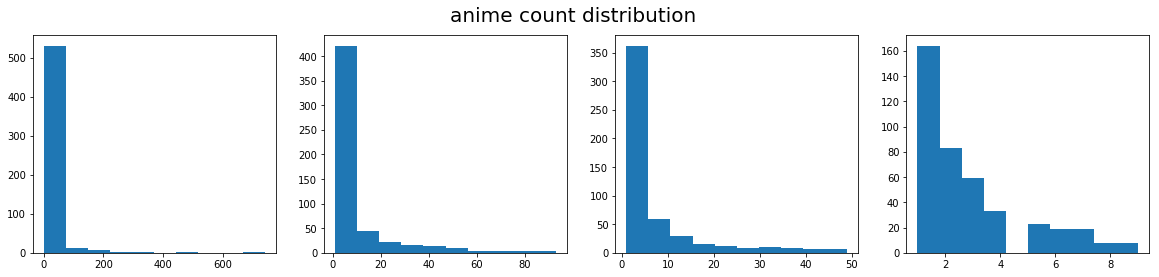

In [17]:
#plot the distribution of anime counts
f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize = (20,4))
ax0.hist([elem for elem in studio_count.values() if elem > 0])
ax1.hist([elem for elem in studio_count.values() if elem > 0 and elem < 100])
ax2.hist([elem for elem in studio_count.values() if elem > 0 and elem < 50])
ax3.hist([elem for elem in studio_count.values() if elem > 0 and elem < 10])
plt.suptitle("anime count distribution", fontsize=20)
plt.show()

In [18]:
#separate array from dataframe
animeScore = animeDF.loc[:, ' score']
animeMember = animeDF.loc[:, ' members']

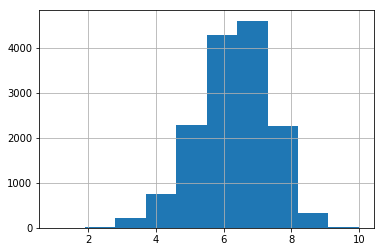

In [19]:
#plot the histogram of score distribution
animeScore.hist()

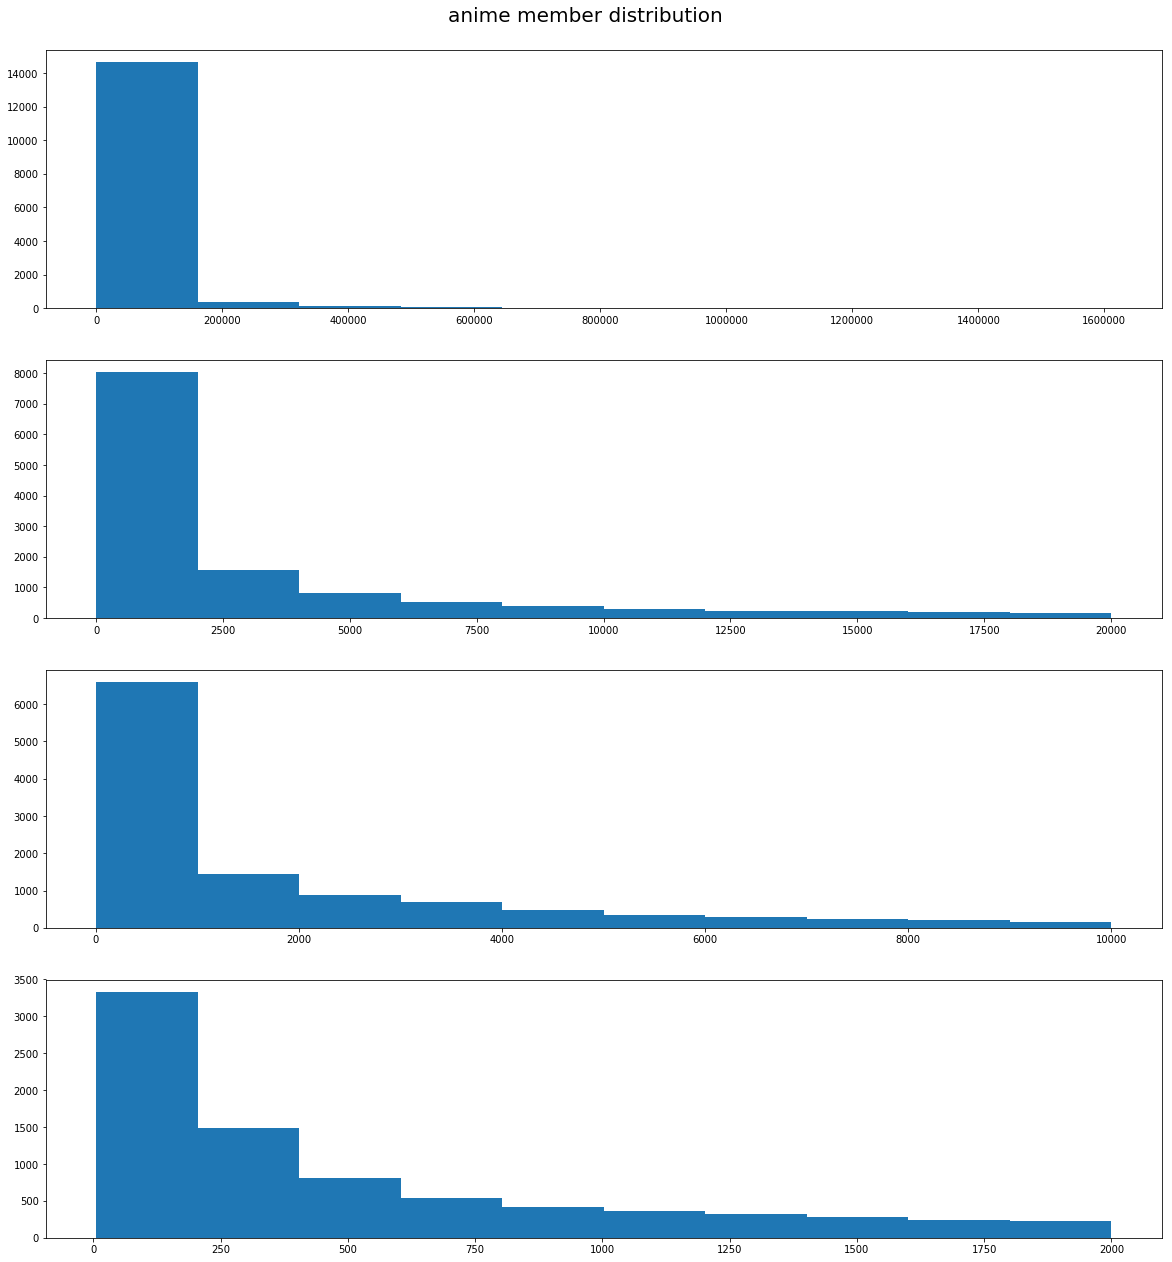

In [20]:
#plot the distribution of anime member
f, ((ax0), (ax1), (ax2), (ax3)) = plt.subplots(4,1, figsize = (20,20))
ax0.hist([elem for elem in animeMember if elem > 0])
ax1.hist([elem for elem in animeMember if elem > 0 and elem < 20000])
ax2.hist([elem for elem in animeMember if elem > 0 and elem < 10000])
ax3.hist([elem for elem in animeMember if elem > 0 and elem < 2000])
plt.suptitle("anime member distribution", fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

In [21]:
#pick a citeria for 'good' anime
score_thres= animeScore.quantile(0.8) #pick 80 percentile
member_thres = animeMember.quantile(0.8) #pick 80 percentile
print(score_thres)
print(member_thres)

7.210000000000001
17279.2


In [22]:
#return whether the give anime is good
def is_good_anime(i):
    return animeMember[i] > member_thres and animeScore[i] > score_thres

In [23]:
#find studios with highest 'good' anime count
good_count = {}
for i, list_text in enumerate(animeStudio):
    if is_good_anime(i):  
        lst = parse_list_text(list_text)
        for word in lst:
            if word in good_count :
                good_count[word] += 1
            else :
                good_count[word] = 1
find_n_max(good_count, 10)

{'Production I.G': 112,
 'Madhouse': 105,
 'Sunrise': 103,
 'J.C.Staff': 103,
 'Toei Animation': 97,
 'A-1 Pictures': 92,
 'Studio Deen': 90,
 'Bones': 67,
 'Kyoto Animation': 63,
 'Studio Pierrot': 59}

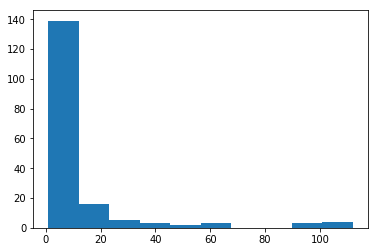

In [24]:
#plot distribution of good anime count
plt.hist([elem for elem in good_count.values() if elem > 0])
plt.show()

In [25]:
#how many anime one studio will produce on average
mean_anime_per_studio = animeDF.shape[0] / len(studio_count)
mean_anime_per_studio

27.429084380610412

In [26]:
#find the top ten studios with good ratio
good_ratio = {}
for m in studio_count:
    if m in good_count and studio_count[m] > mean_anime_per_studio/10:
        good_ratio[m] = good_count[m]/studio_count[m] * 100
    else:
        good_ratio[m] = 0
find_n_max(good_ratio, 10) 

{'Studio Chizu': 100.0,
 'Animation Do': 100.0,
 'Studio Rikka': 85.71428571428571,
 'Shuka': 80.0,
 'David Production': 67.85714285714286,
 'Studio VOLN': 57.14285714285714,
 'Bones': 55.833333333333336,
 'AIC Build': 55.55555555555556,
 'Lerche': 54.166666666666664,
 'Kyoto Animation': 53.38983050847458}

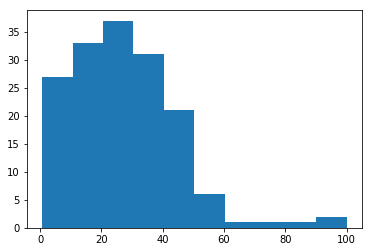

In [27]:
#plot the distribution of the good ratio
plt.hist([elem for elem in good_ratio.values() if elem > 0])
plt.show()

## 2. Recommender System

Build a recommender system based on synopsis and genre. For synopsis, since there are many words and some words are not important, like 'the', 'and', we will use the technique, called 'term frequency - inverse document frequency' or tfidf to retrieve important keywords that represent each anime. For genre, we will use count match score. The similarity between two anime will be given by cosine similarity (a projection of one anime onto another).

tutorial from https://www.kaggle.com/yashsharma8388/anime-recommendation-based-on-synopsis-and-genre/notebook

In [28]:
#import more library for recommender system
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [29]:
#create a map from title to index in dataframe
animeName = animeDF.loc[:, ' name']
indexMap = pd.Series(animeDF.index, index = animeDF[' name'])

In [30]:
#iniatiate tfidf vector and count vector 
tfidf = TfidfVectorizer(stop_words = "english")
countvec = CountVectorizer(stop_words = "english")

In [31]:
#compute cosine similarity which is a score/measurement of the similarity between anime titles
animeSyn = animeDF.loc[:, ' synopsis']
animeSyn = animeSyn.fillna('')
tfidf_mat = tfidf.fit_transform(animeSyn)
countvec_mat = countvec.fit_transform(animeGenre)
syn_sim = linear_kernel(tfidf_mat, tfidf_mat) #compute cosine similarity
genre_sim = linear_kernel(countvec_mat, countvec_mat)

In [32]:
#get recommendation
def getRec(title, n):
    index = indexMap[title]
    
    score1 = list(enumerate(syn_sim[index]))
    score2 = list(enumerate(genre_sim[index]))
    
    score1 = sorted(score1, key = lambda x: x[0], reverse = False)
    score2 = sorted(score2, key = lambda x: x[0], reverse = False)    
    
    combined_score = [(index, (s1 + s2) / 2) for (index, s1), (_, s2) in zip(score1, score2)]
    
    combined_score = sorted(combined_score, key = lambda x: x[1], reverse = True)
    
    recommend = [i[0] for i in combined_score[1:1 + n]]
    
    return animeName.iloc[recommend] 

In [33]:
def showRec(title):
    rec = getRec(title, 10)
    for _ in rec:
        print(_)

In [34]:
#show the recommendation for 'Kimi no Na wa.'
showRec('Kimi no Na wa.')

Clannad
Aura: Maryuuin Kouga Saigo no Tatakai
Wind: A Breath of Heart (TV)
Honoo no Mirage
Shakugan no Shana
Kokoro Connect
Wind: A Breath of Heart OVA
Mushikui Psycheledism
Little Busters!: Refrain
Shakugan no Shana II (Second)


## 3. Autocorrect and Titles matching

Now, we will implement autocorrect and alternative titles matching system to enrich recommender system. To autocorrect, I use python package 'pyspellchecker' to find the most likely correct word to the given word. Then, we will account for alternative title. For example, 'Your Name' is an english name of 'Kimi no Na wa.'

In [35]:
#pyspellchecker library from https://pyspellchecker.readthedocs.io/en/latest/index.html
from spellchecker import SpellChecker

In [36]:
#load our anime titles as custom dictionary for autocorrect
#do not load any reference dictionay, we will put our titles + alternative tiles as dictionary
spell = SpellChecker(language=None)

animeEngTitle = animeDF.loc[:, ' title_english']
animeEngTitle = animeEngTitle.fillna('')

animeAltitle = animeDF.loc[:, ' title_synonyms']
animeAltitle = animeAltitle.fillna('')
altitle_list = []
for lst_text in animeAltitle:
    lst = parse_list_text(lst_text)
    for altitle in lst:
        altitle_list = altitle_list + [altitle]
spell.word_frequency.load_words(list(animeName) + list(animeEngTitle) + altitle_list)

In [37]:
spell.correction('kokoro connec') #incorrect name

'kokoro connect'

In [38]:
spell.correction('girls & panzer') #correct name

'girls & panzer'

In [39]:
spell.correction('girls and panzer') #incorrect alternative title

'girls und panzer'

In [40]:
#create a map from alternative titles to titles
altitleMap = {}
for index, name in enumerate(animeName):
    altitleMap[name.lower()] = name
    eng = animeEngTitle[index].lower()
    if len(eng) != 0:
        altitleMap[eng.lower()] = name
    lst = parse_list_text(animeAltitle[index])
    for altitle in lst:
        altitleMap[altitle.lower()] = name

In [41]:
#recommender with autocorrect and alternative title
def showRec2(title):
    title = spell.correction(title)
    title = altitleMap[title.lower()]
    showRec(title)

In [42]:
showRec('Shigatsu wa Kimi no Uso') #showRec

Fuuka
Sakamichi no Apollon
Kiniro no Corda: Primo Passo
Kimi to Boku.
Hitorijime My Hero
Tsuyoshi Shikkari Shinasai
Mix: Meisei Story
Shinkyoku Soukai Polyphonica
Kimi to Boku. 2
Aoki Densetsu Shoot!


In [43]:
showRec2('Shigatsu wa Kimi no Uso') #test showRec2

Fuuka
Sakamichi no Apollon
Kiniro no Corda: Primo Passo
Kimi to Boku.
Hitorijime My Hero
Tsuyoshi Shikkari Shinasai
Mix: Meisei Story
Shinkyoku Soukai Polyphonica
Kimi to Boku. 2
Aoki Densetsu Shoot!


In [44]:
showRec2('Your Lie in April') #alternative title

Fuuka
Sakamichi no Apollon
Kiniro no Corda: Primo Passo
Kimi to Boku.
Hitorijime My Hero
Tsuyoshi Shikkari Shinasai
Mix: Meisei Story
Shinkyoku Soukai Polyphonica
Kimi to Boku. 2
Aoki Densetsu Shoot!


In [45]:
showRec2('You Lie in April') #misspell alternative title

Fuuka
Sakamichi no Apollon
Kiniro no Corda: Primo Passo
Kimi to Boku.
Hitorijime My Hero
Tsuyoshi Shikkari Shinasai
Mix: Meisei Story
Shinkyoku Soukai Polyphonica
Kimi to Boku. 2
Aoki Densetsu Shoot!
